Jeremy Byrne (jeb430@pitt.edu)

This project is a data-driven attempt to determine the "best" neighborhood in the City of Pittsburgh. Our group has defined the best neighborhood as the one that provides the best environment to promote health and fitness. It is my belief that access to facilities is a key factor in creating a health-forward neighborhood. There exists a dataset from the Western Pennsylvania Regional Data Center that tracks courts and rinks broken down by each neighborhood. This notebook will process and visualize what neighborhood has the highest number of courts and rinks. The dataset is titled "City of Pittsburgh Courts and Rinks" and can be found at https://data.wprdc.org/dataset/city-of-pittsburgh-courts


In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

- I am using pandas, geopandas, matplotlib and pyplot (style 'fivethirtyeight').

In [2]:
df = pd.read_csv("courts_and_rinks.csv")

- Dataset 'courts_and_rinks.csv' from WPRDC's website is copied locally to our github repository.

In [3]:
df['neighborhood'].value_counts().head(10)

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
Allegheny Center        9
Troy Hill               8
Beechview               7
South Side Slopes       6
Lower Lawrenceville     6
Name: neighborhood, dtype: int64

- The code above counts every unique court/rink and groups it by the neighborhood that it is located in. The top ten are listed above, and Squirrel Hill South contains the most.

Text(0, 0.5, 'Number of Courts and Rinks')

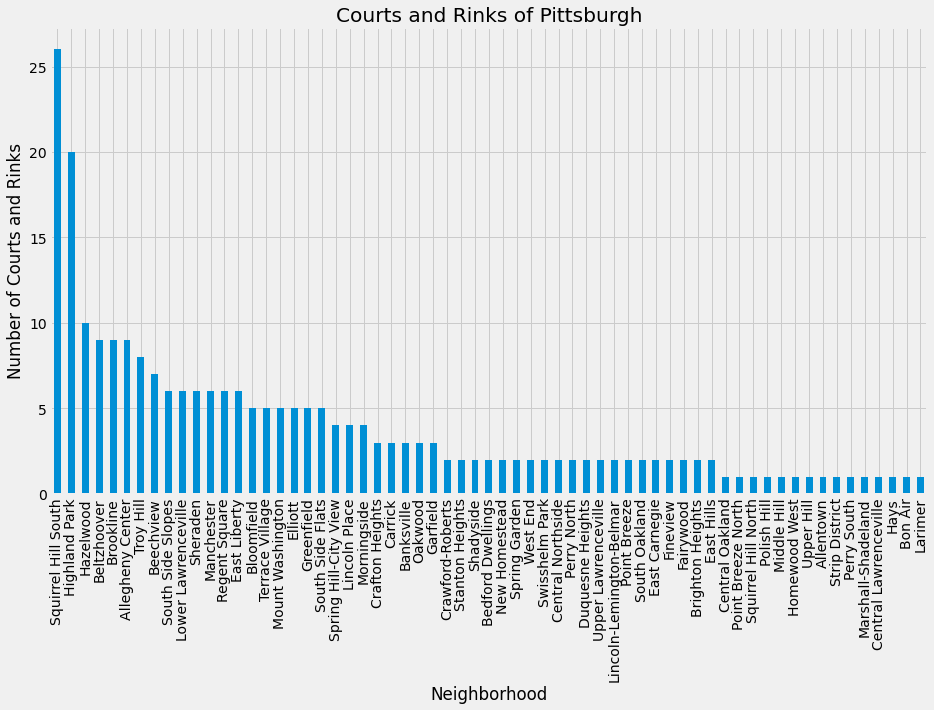

In [4]:
df['neighborhood'].value_counts().plot( kind='bar', figsize=(14,8) )
plt.title("Courts and Rinks of Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Courts and Rinks")

- The bar graph visually represents the raw data from the dataset. It can clearly be seen the significantly greater number of courts and rinks from the top two neighborhoods.

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [6]:
pr_counts1 = df.groupby("neighborhood").count()
pr_counts2 = pr_counts1.groupby("neighborhood").sum()['park']
pr_counts2.sort_values(ascending=False)

neighborhood
Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
                       ..
Perry South             1
Bon Air                 1
Upper Hill              1
Allentown               1
Middle Hill             1
Name: park, Length: 63, dtype: int64

In [7]:
parks_map = neighborhoods.merge(pr_counts2, how='left', left_on='hood', right_on='neighborhood')
parks_map[['hood','park','geometry']].head()

,hood,park,geometry
0,Central Oakland,1.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


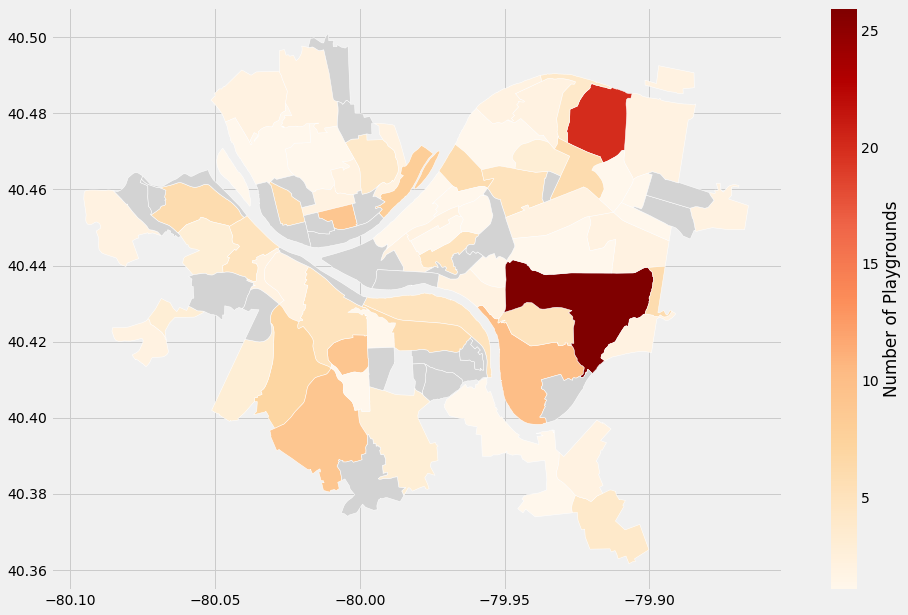

In [8]:
parks_map.plot(column='park', 
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Number of Playgrounds"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

**Conclusion:**
My selection for best neighborhood as judged by its large number of court or rink facilities is **Squirrel Hill**. This is not surprising to me as Squirrel Hill is anecdotally one of the best neighborhoods as agreed upon by the many lifelong Pittsburghers that I know. The easy access to fitness facilities is likely to promote and enhance the fitness of the residents.